In [1]:
!pip install matplotlib
!pip install scipy
!pip install numpy
import matplotlib.pyplot as plt
import scipy
import numpy as np

Pearson's correlation coefficient: $$\rho = \frac{\sum\limits_{i=1}^{n}\left(a_i - a_\mu\right)\left(b_i - b_\mu\right)}{\sigma_a \sigma_b}$$

Spearman's correlation coefficient: $$\rho = \frac{\sum\limits_{i=1}^{n}\left(a_{i,rank} - a_{\mu,rank}\right)\left(b_{i,rank} - b_{\mu,rank}\right)}{\sigma_{a,rank} \sigma_{b,rank}}$$

# Corrélation entre les métriques de longueurs des contenus et réponses de notre corpus.

In [8]:
import spacy
from datasets import load_dataset

# On importe le corpus.
dataset = load_dataset("csv", data_files="../data/clean/datas_chat.csv", split="train")
dataset = dataset.to_pandas()

# On importe cette fois le modèle pour le français.
nlp = spacy.load("fr_core_news_sm")

# On affiche notre dataset pour voir s'il est correctement formé.
dataset

,id,title,content,question,answer
0,1,capillarité,Cet article ne cite pas suffisamment ses sour...,Quelle force de tension se produit sur la capi...,"{'text': 'forces de tension superficielle', '..."
1,2,félidés,Félidés • Félins «Félin» redirige ici. Pour l...,Quel est le denier encêtre commun des félins m...,"{'text': 'Pseudaelurus', 'answer_start': 1238}"
2,3,sourire,"Pour les articles homonymes, voir Sourire (ho...",Que témoigne le sourire ?,"{'text': 'la sympathie', 'answer_start': 124}"
3,4,races,«Racial» redirige ici. Pour l’article homophon...,Que désigne le mot «race» ?,"{'text': ""des groupes d'une même espèce animal..."
4,5,toilette,"Pour les toiletteurs, voir Toiletteur . Le t...",Quand est apparue la tondeuse pour chien ?,"{'text': 'en 1850', 'answer_start': 648}"
5,6,clavicule,Certaines informations figurant dans cet artic...,Où se situe la clavicule ?,"{'text': 'la ceinture scapulaire', 'answer_st..."
6,7,poisson,"Pour les articles homonymes, voir Poisson (ho...",Quel est la répartition des poissons dans l'oc...,{'text': '50% des poissons vivraient dans 17% ...
7,8,papilles,"En biologie et en anatomie , une papille ...",De quoi est composé une pupille ?,"{'text': 'un tissu épithélial', 'answer_start'..."
8,9,animaux_de_compagnie,Un animal de compagnie est un animal recev...,Qu'est ce qui est attendu d'un animal de compa...,"{'text': 'sa présence, de sa beauté, de sa jov..."
9,10,miaulement,Le miaulement est une vocalisation émise pa...,Quel est l'onomatopée du miaulement en français ?,"{'text': 'miaou', 'answer_start': 127}"


In [10]:
# On récupère les longueurs des contextes dans une liste.
longueurs_contextes = []
dataset["context_length"] = None
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.content)
    longueurs_contextes.append(len(doc))

print(longueurs_contextes)

[142, 288, 223, 518, 354, 119, 336, 50, 396, 46, 470, 82, 65, 498, 123, 78, 348, 469, 326, 237, 123, 173, 89, 189, 294, 135, 25, 498, 976, 258, 65, 518, 974, 132, 244, 246, 1071, 237, 313, 84, 174, 242, 136, 376, 107, 1294, 267, 225, 203, 104]


In [12]:
# On récupère les longueurs des réponses dans une autre liste.
longueurs_reponses = []
dataset["answer_length"] = None
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.answer)
    longueurs_reponses.append(len(doc))

print(longueurs_reponses)

[19, 15, 16, 21, 16, 18, 27, 17, 29, 15, 15, 18, 16, 21, 16, 18, 16, 17, 32, 25, 19, 23, 16, 20, 19, 16, 21, 17, 18, 15, 16, 23, 27, 16, 16, 19, 16, 33, 17, 27, 16, 17, 19, 17, 28, 15, 15, 44, 28, 16]


--------------------------------
mode: two-sided
Pearson: -1.5573e-02; p-value: +9.1452e-01
Spearman: +4.5083e-02; p-value: +7.5589e-01
--------------------------------
mode: greater
Pearson: -1.5573e-02; p-value: +5.4274e-01
Spearman: +4.5083e-02; p-value: +3.7795e-01
--------------------------------
mode: less
Pearson: -1.5573e-02; p-value: +4.5726e-01
Spearman: +4.5083e-02; p-value: +6.2205e-01


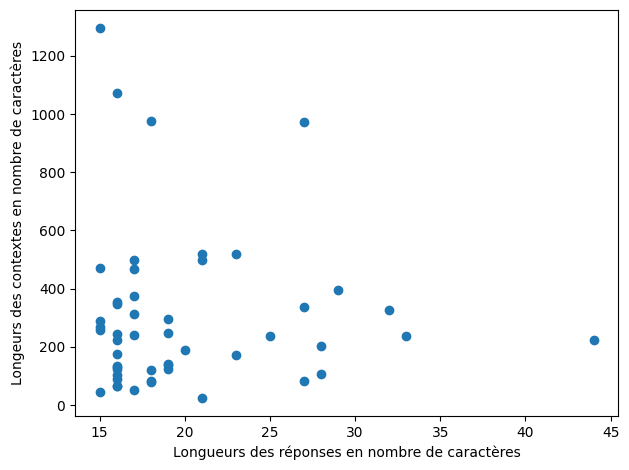

In [15]:
# On va créer le graphique qui indiquera s'il y a corrélation entre nos deux métriques de longueurs.

for mode in ["two-sided", "greater", "less"]:
    print("-" * 32)
    print("mode:", mode)
    corr, p = scipy.stats.pearsonr(
        longueurs_contextes, longueurs_reponses, alternative=mode
    )
    print(f"Pearson: {corr:+.4e}; p-value: {p:+.4e}")
    corr, p = scipy.stats.spearmanr(
        longueurs_contextes, longueurs_reponses, alternative=mode
    )
    print(f"Spearman: {corr:+.4e}; p-value: {p:+.4e}")

plt.scatter(longueurs_reponses, longueurs_contextes)
plt.xlabel("Longueurs des réponses en nombre de caractères")
plt.ylabel("Longeurs des contextes en nombre de caractères")
plt.tight_layout()
plt.show()

## La corrélation : 
- Les valeurs de corrélations obtenues dans les trois modes avec les tests de Pearson et Spearman sont des valeurs proche de 0.
- On peut donc penser qu'il n'y a pas de corrélation entre nos deux métriques de longueurs dans le cas de nos données. 

## La significativité : 
- Les résultats que nous obtenons ne semblent pas significatifs car toutes les valeurs de p-value sont supérieures à 0,05.

# Démonstration de la loi binomiale et de la répartition des probabilités sur un lancer de pièces.

n: 16384; prob: 0.0100; p-value: +0.0000e+00
n: 16384; prob: 0.0200; p-value: +0.0000e+00
n: 16384; prob: 0.0300; p-value: +4.1341e-260
n: 16384; prob: 0.0400; p-value: +5.1614e-187
n: 16384; prob: 0.0500; p-value: +4.1862e-141
n: 16384; prob: 0.0600; p-value: +1.1158e-80
n: 16384; prob: 0.0700; p-value: +3.5586e-40
n: 16384; prob: 0.0800; p-value: +4.7696e-17
n: 16384; prob: 0.0900; p-value: +2.4463e-05
n: 16384; prob: 0.1000; p-value: +3.4183e-01
n: 16384; prob: 0.1100; p-value: +2.8626e-03
n: 16384; prob: 0.1200; p-value: +3.0755e-22
n: 16384; prob: 0.1300; p-value: +1.2763e-36
n: 16384; prob: 0.1400; p-value: +1.4599e-65
n: 16384; prob: 0.1500; p-value: +9.1829e-94
n: 16384; prob: 0.1600; p-value: +6.9225e-134
n: 16384; prob: 0.1700; p-value: +2.7101e-178
n: 16384; prob: 0.1800; p-value: +2.0311e-225
n: 16384; prob: 0.1900; p-value: +5.9052e-261
n: 16384; prob: 0.2000; p-value: +0.0000e+00
n: 16384; prob: 0.2100; p-value: +0.0000e+00
n: 16384; prob: 0.2200; p-value: +0.0000e+00
n: 

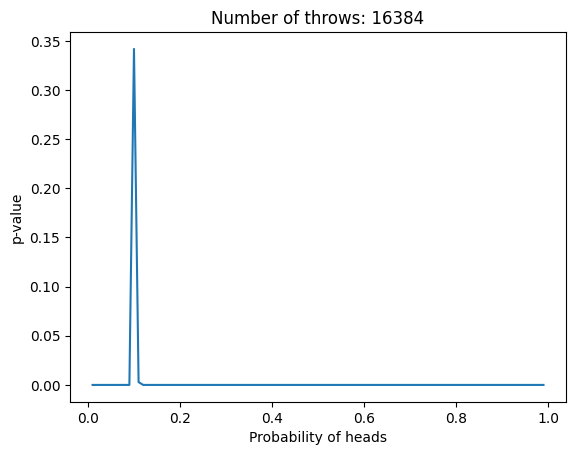

In [22]:
def lancer_n_pieces(n=50, p=0.5):
    a = np.random.random(n)
    a = np.array(a >= p, dtype=np.int8)
    return a


n = 4096 * 4
x = []
y = []
for prob in np.linspace(0.01, 0.99, 99):
    serie_n_pieces = lancer_n_pieces(n=n, p=prob)
    # ici c'est une loi binomiale, car on a une répétition
    result = scipy.stats.binomtest(k=sum(serie_n_pieces), n=n, p=0.9)
    print(f"n: {n}; prob: {prob:.4f}; p-value: {result.pvalue:+.4e}")
    x.append(prob)
    y.append(result.pvalue)
plt.plot(x, y)
plt.xlabel("Probability of heads")
plt.ylabel("p-value")
plt.title(f"Number of throws: {n}")
plt.show()

# p-value

Dans un pile-ou-face, on souhaite savoir si la pièce est biaisée.
Moyen: lancer la pièce un grand nombre de fois, et voir si une tendance émerge.

In [23]:
lancer_n_pieces(n=10, p=0.25)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int8)

_Problème: même si la pièce n'est pas biaisée, la série qu'on observe reste possible._

Se pose alors la question : quelle est la probabilité d'observer une série au moins aussi extrême que celle observée (dans notre cas, s'écarter encore plus du 50/50).
Cela correspond à la *p-value*.

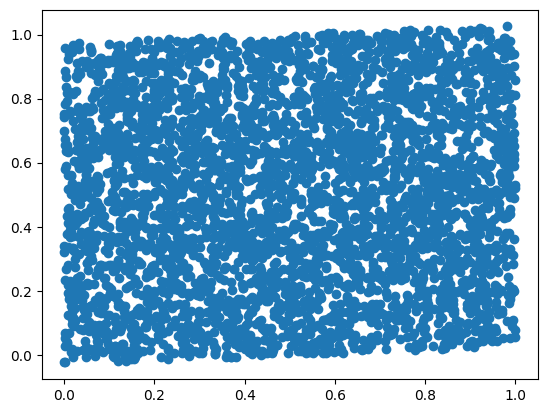

correlation: 0.0553; p-value: 0.0004


In [24]:
n = 4096
a = np.random.random(n)
b = np.random.random(n)
a_delta_to_mu = a - np.mean(a)
b_delta_to_mu = b - np.mean(b)
a_delta_to_mu_norm = a_delta_to_mu / np.std(a)
b_delta_to_mu_norm = b_delta_to_mu / np.std(b)
b += a_delta_to_mu_norm * 0.015
plt.scatter(a, b)
plt.show()

corr, p = scipy.stats.pearsonr(a, b)
print(f"correlation: {corr:.4f}; p-value: {p:.4f}")